In [1]:
import numpy as np
from matplotlib import pyplot as plt 


In [6]:
file = open('attn_loss.txt')
val_list = file.readlines()

In [7]:
file.close()

In [8]:
loss_D = []
loss_G = []
loss_w = []
loss_s = []
loss_perceptual = []
loss_KL = []

for val in val_list:
    if val.find("g_loss0") == -1 and val.find("errD") == -1:
        continue
    
    else:
        val_split = val.split(" ")
        
        if val.find("errD") != -1:
            
            errD0 = float(val_split[1])
            errD1 = float(val_split[3])
            errD2 = float(val_split[5])
            
            LossD =  errD0 + errD1 + errD2
            loss_D.append(LossD)
            
        else:
            
            g_loss0 = float(val_split[1])
            g_loss1 = float(val_split[3])
            g_loss2 = float(val_split[5])
            w_loss = float(val_split[7])
            s_loss = float(val_split[9])
            #perceptual_loss = float(val_split[11])
            kl_loss = float(val_split[11])
            
            LossG =  g_loss0 + g_loss1 + g_loss2 + w_loss + s_loss + kl_loss
            loss_G.append(LossG)
            loss_w.append(w_loss)
            loss_s.append(s_loss)
            #loss_perceptual.append(perceptual_loss)
            loss_KL.append(kl_loss)
            

            

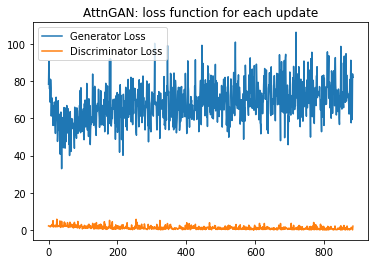

In [10]:
plt.plot(loss_G,label="Generator Loss")
plt.plot(loss_D,label="Discriminator Loss")
plt.legend()
plt.title("AttnGAN: loss function for each update")
plt.show()

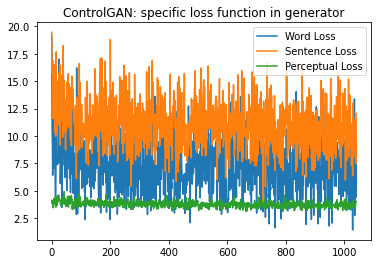

In [23]:
plt.plot(loss_w,label="Word Loss")
plt.plot(loss_s,label="Sentence Loss")
plt.plot(loss_perceptual,label="Perceptual Loss")
plt.legend()
plt.title("ControlGAN: specific loss function in generator")
plt.show()

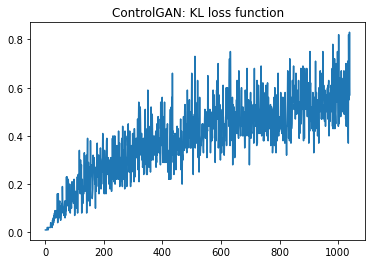

In [24]:
plt.plot(loss_KL)
plt.title("ControlGAN: KL loss function")
plt.show()

In [13]:
val = val_list[0]
val_split = val.split(" ")
val_split

errD0 = float(val_split[1])
errD1 = float(val_split[3])
errD2 = float(val_split[5])
LossD =  errD0 + errD1 + errD2


print(errD0)
print(errD1)
print(errD2)

2.31
2.32
1.98


In [17]:
val = val_list[1]
val_split = val.split(" ")
val_split

g_loss0 = float(val_split[1])
g_loss1 = float(val_split[3])
g_loss2 = float(val_split[5])
w_loss = float(val_split[7])
s_loss = float(val_split[9])
perceptual_loss = float(val_split[11])
kl_loss = float(val_split[13])

print(s_loss)
print(kl_loss)

17.99
0.01


In [14]:
val = '                  Loss_D: 6.86 Loss_G: 54.39 Time: 771.18s\n'
val.find("loss")

-1